# TP 3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en "Material_TPs/TP3/images" a partir del template "Material_TPs/TP3/template"

In [1]:
#%pip install opencv-contrib-python

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Librerías propias
from utils import template_matching


In [2]:
# Carga de las imágenes

template_rgb = cv.imread('resources/template/pattern.png')

coca_cola_logo_img = cv.imread('resources/images/COCA-COLA-LOGO.jpg')
coca_logo_1_img = cv.imread('resources/images/coca_logo_1.png')
coca_logo_2_img = cv.imread('resources/images/coca_logo_2.png')
coca_retro_1_img = cv.imread('resources/images/coca_retro_1.png')
coca_retro_2_img = cv.imread('resources/images/coca_retro_2.png')
logo_1_img = cv.imread('resources/images/logo_1.png')

images = [coca_cola_logo_img, coca_logo_1_img, coca_logo_2_img, coca_retro_1_img, coca_retro_2_img, logo_1_img]

coca_multi_img = cv.imread('resources/images/coca_multi.png')

A fin de resolver el presente TP se han probado distintas alternativas, algoritmos y estrategias. Se describirán únicamente las soluciones que resultaron efectivas y el algoritmo resultante de esa investigación, a fin de facilitar la comprensión del trabajo.
En el archivo "template_matching.py" residen dos métodos principales:

1. template_matching_canning_with_temp_resizing(template_bgr, image_bgr, method, canny_threshold1, canny_threshold2, min_resolution_coeff, debug=False)

2. mult_template_matching_canning_with_temp_resizing(template_bgr, image_bgr, method, canny_threshold1, canny_threshold2, min_resolution_coeff, threshold, debug=False)

Estos dos algoritmos son muy similares, realizan un template matching, buscando la imagen "template_bgr" dentro de "image_bgr". Ambos algoritmos escalan la imagen del template (sin deformarlo) al máximo tamaño posible dentro de la imagen "image_bgr". De esta forma, se busca el template dentro de un ciclo for, en el cual se va escalando el template desde 1.00 a 0.1. Se guardan los resultados de cv.matchTemplate(..) en todas las iteraciones para luego mostrarlos. En el caso de template_matching_canning_with_temp_resizing(..) se muestra el de mayor valor, y para el caso de mult_template_matching_canning_with_temp_resizing(..) se muestran los resultados mayores a "threshold" que es pasado como parámetro.

Para facilitar la búsqueda, se realizó un posprocesamiento sobre las imágenes. "canny_threshold1" y "canny_threshold2" setean por parámetro los thresholds para el cv.Canny(..) que se emplea. También dentro de los algoritmos se hace uso de cv.GaussianBlur(..) y cv.normalize(..) con valores estandarizados.

Cabe destacar que a medida que el template se va escalando, se hace cada vez más pequeño. En determinadas ocasiones, se hace tan pequeño que pierde mucha resolución y el método cv.matchTemplate(..) arroja falsos positivos. Es por esto que "min_resolution_coeff" es una variable que controla esa resolución, tomando una relación entre "template_width_scaled/template_width_original"; si ese cociente es menor a "min_resolution_coeff", el ciclo for termina a fin de evitar falsos positivos por una resolución insuficiente.

También, cuando la calidad de la imagen es baja, el matching se ve perjudicado. Se empleó BRISQUE, un NR-IQA (non-reference image quality assessment) para fijar un score mínimo que la imagen debe cumplir antes de ser procesada. Si el score es menor a "brisque_min_score", se duplica el tamaño de la imagen, mejorando notablemente el score.

Ocurre algo similar cuando el tamaño de la imagen es mucho mayor al template. Las últimas iteraciones de cv.matchTemplate(..) arrojan falsos positivos debido a los sucesivos escalamientos. Es por esto que cuando el ratio de tamaños entre la imagen y el template es mayor a 3x, se escala la imagen a la mitad de su tamaño.

La variable "debug" muestra las iteraciones que van sucediente paso a paso, a fin de observar detalladamente el comportamiento del algoritmo.

Observar que la generalización del algoritmo para múltiples detecciones en ambos casos se da de forma natural, sin separar ambos problemas en casos demasiado distintos.

El método que mejores resultados arrojó fue "cv.TM_CCOEFF_NORMED".


A continuación, se muestran los resultados obtenidos:


1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

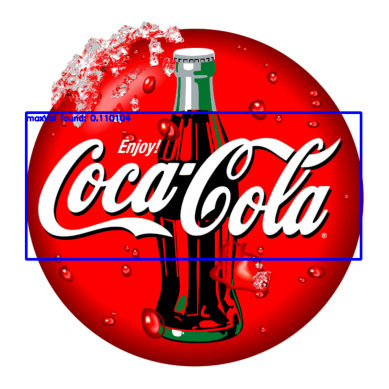

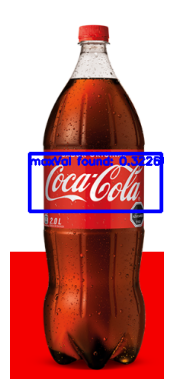

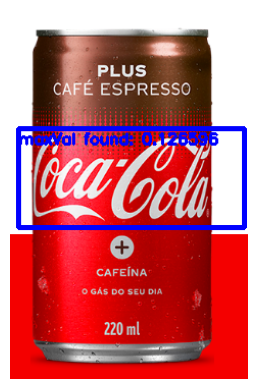

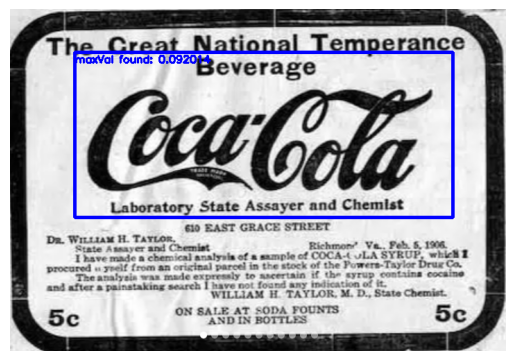

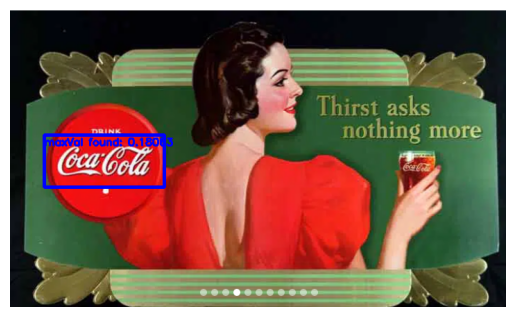

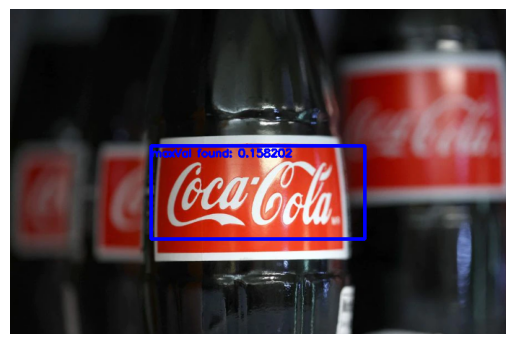

In [3]:

method = 'cv.TM_CCOEFF_NORMED'

canny_threshold1 = 150
canny_threshold2 = 250

min_resolution_coeff = 0.39

for image in images:
    template_matching.template_matching_canning_with_temp_resizing(template_rgb, image, method, canny_threshold1, canny_threshold2, min_resolution_coeff)


2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

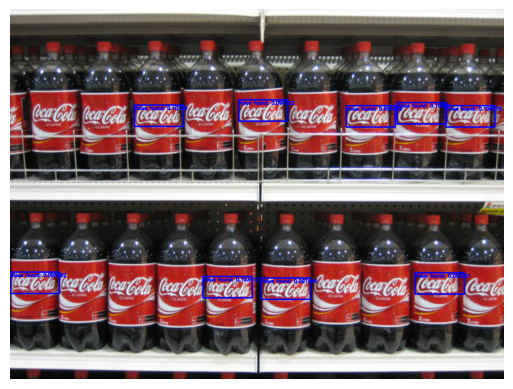

In [4]:
method = 'cv.TM_CCOEFF_NORMED'

canny_threshold1 = 150
canny_threshold2 = 250

detection_threshold = 0.095

min_resolution_coeff = 0.39

template_matching.mult_template_matching_canning_with_temp_resizing(template_rgb, coca_multi_img, method, 
                                                                    canny_threshold1, canny_threshold2, 
                                                                    min_resolution_coeff, detection_threshold, debug=False)

3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

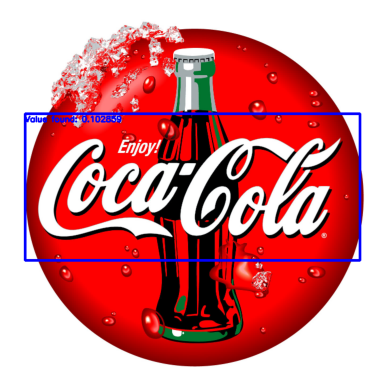

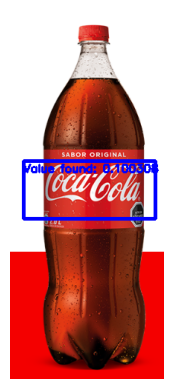

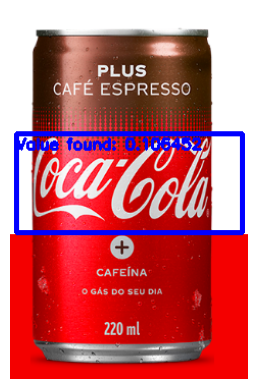

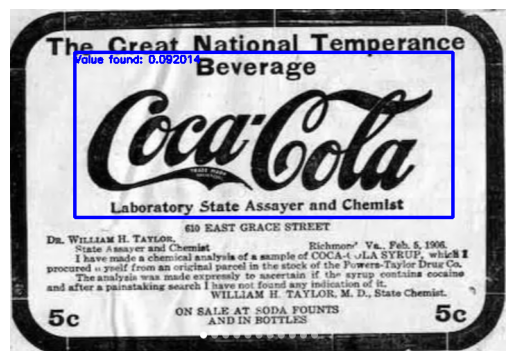

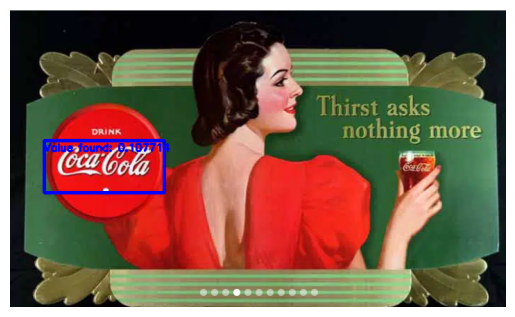

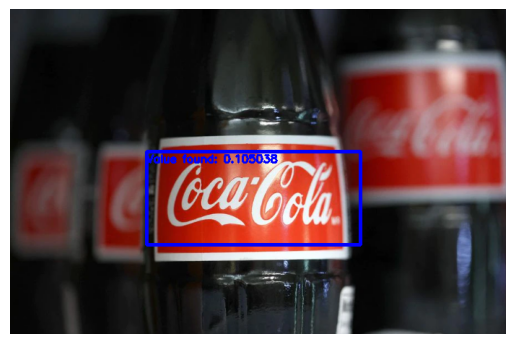

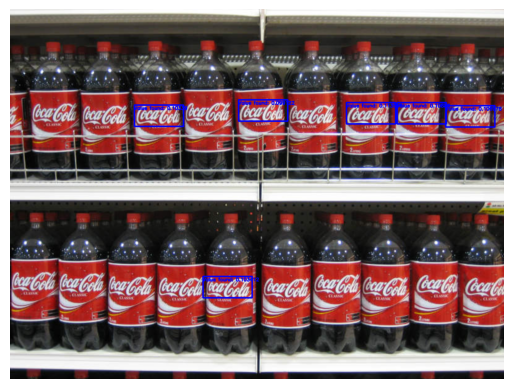

In [7]:
method = 'cv.TM_CCOEFF_NORMED'

canny_threshold1 = 150
canny_threshold2 = 250
min_resolution_coeff = 0.39
detection_threshold = 0.099

images = [coca_cola_logo_img, coca_logo_1_img, coca_logo_2_img, coca_retro_1_img, coca_retro_2_img, logo_1_img, coca_multi_img]

for image in images:
    template_matching.mult_template_matching_canning_with_temp_resizing(template_rgb, image, method, 
                                                                    canny_threshold1, canny_threshold2, 
                                                                    min_resolution_coeff, detection_threshold)

